# X Online Education Lead Scoring Analysis

The objective of this analysis is to predict the Customers of X Online Education are converted or not with lead scoring analysis based on customer behaviour towards website or anything about X Online Education.

Data Description :
* Prospect ID : A unique ID with which the customer is identified.
* Lead Number : A lead number assigned to each lead procured.
* Lead Origin : The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
* Lead Source : The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
* Do Not Email : An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
* Do Not Call : An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
* Converted : The target variable. Indicates whether a lead has been successfully converted or not.
* TotalVisits : The total number of visits made by the customer on the website.
* Total Time Spent on Website : The total time spent by the customer on the website.
* Page Views Per Visit : Average number of pages on the website viewed during the visits.
* Last Activity : Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
* Country : The country of the customer.
* Specialization : The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
* How did you hear about X Education : The source from which the customer heard about X Education.
* What is your current occupation : Indicates whether the customer is a student, unemployed or employed.
* What matters most to you in choosing this product : An option selected by the customer indicating what is their main motto behind buying this product.
* Search : Indicating whether the customer had seen the ad in any of the listed items.
* Magazine : Indicating whether the customer had seen the ad in Magazine.
* Newspaper Article : Indicating whether the customer had seen the ad in Newspaper Article.
* X Education Forum : Indicating whether the customer had seen the ad in X Education Forum.
* Newspaper : Indicating whether the customer had seen the ad in Newspaper.
* Digital Advertisement : Indicating whether the customer had seen the ad in Digital Advertisement.
* Through Recommendations : Indicates whether the customer came in through recommendations.
* Receive More Updates About Our Courses : Indicates whether the customer chose to receive more updates about the courses.
* Tags : Tags assigned to customers indicating the current status of the lead.
* Lead Quality : Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
* Update me on Supply Chain Content : Indicates whether the customer wants updates on the Supply Chain Content.
* Get updates on DM Content : Indicates whether the customer wants updates on the DM Content.
*Lead Profile : A lead level assigned to each customer based on their profile.
* City : The city of the customer.
* Asymmetrique Activity Index : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Activity Index : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Profile Index : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Activity Score : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Profile Score : An index and score assigned to each customer based on their activity and their profile
* I agree to pay the amount through cheque : Indicates whether the customer has agreed to pay the amount through cheque or not.
* A free copy of Mastering The Healthy Live : Indicates whether the customer wants a free copy of 'Mastering the Healthy Live' or not.
* Last Notable Activity : The last notable acitivity performed by the customer.

# Data Preparation & Profilling

In [ ]:
!pip install shap
!pip install pycaret
import shap
from pycaret.classification import *

RuntimeError: ignored

RuntimeError: ignored

RuntimeError: ignored

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split, cross_val_score, ParameterSampler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report

palette = {0: 'tab:blue',1: 'tab:orange'}

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dhykac/X_Education_Lead_Score_Customer_Analysis/main/Leads_X_Education.csv')

In [ ]:
data.shape

(9240, 37)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
data.describe(include="O")

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [ ]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Count unique values for each of the column

for col in data.columns:
    print(f"Column: {col}")
    print(len(data[col].unique()))
    print("="*10)

Column: Prospect ID
9240
Column: Lead Number
9240
Column: Lead Origin
5
Column: Lead Source
22
Column: Do Not Email
2
Column: Do Not Call
2
Column: Converted
2
Column: TotalVisits
42
Column: Total Time Spent on Website
1731
Column: Page Views Per Visit
115
Column: Last Activity
18
Column: Country
39
Column: Specialization
20
Column: How did you hear about X Education
11
Column: What is your current occupation
7
Column: What matters most to you in choosing a course
4
Column: Search
2
Column: Magazine
1
Column: Newspaper Article
2
Column: X Education Forums
2
Column: Newspaper
2
Column: Digital Advertisement
2
Column: Through Recommendations
2
Column: Receive More Updates About Our Courses
1
Column: Tags
27
Column: Lead Quality
6
Column: Update me on Supply Chain Content
1
Column: Get updates on DM Content
1
Column: Lead Profile
7
Column: City
8
Column: Asymmetrique Activity Index
4
Column: Asymmetrique Profile Index
4
Column: Asymmetrique Activity Score
13
Column: Asymmetrique Profile S

In [ ]:
# Getting unique values for each of the column
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print("="*10)

Column: Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Column: Lead Number
[660737 660728 660727 ... 579545 579538 579533]
Column: Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Column: Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Column: Do Not Email
['No' 'Yes']
Column: Do Not Call
['No' 'Yes']
Column: Converted
[0 1]
Column: TotalVisits
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 14

# Exploratory Data Analysis

In [ ]:
data.groupby(['Country']).size().sort_values(ascending=False).head()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
dtype: int64

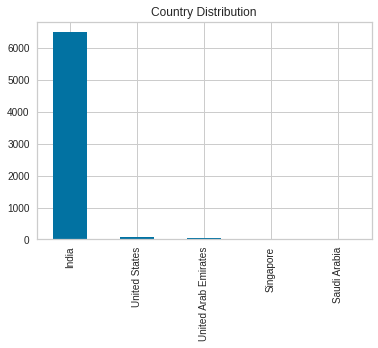

In [ ]:
data['Country'].value_counts().head().plot(kind='bar')
plt.title("Country Distribution")
plt.show()

From the summary above, we know that most of X Education customers are from India.

In [ ]:
data.groupby(['Lead Origin']).size().sort_values(ascending=False).head()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
dtype: int64

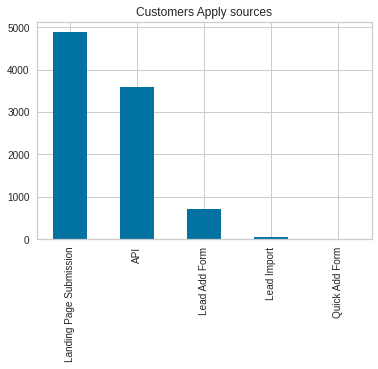

In [ ]:
data['Lead Origin'].value_counts().head().plot(kind='bar')
plt.title("Customers Apply sources")
plt.show()

From the summary we know that most of the customers buy X Education via landing page submission with 4886 customers. This can be used as research materials to know how effective the landing page in term of hook a customer. Also we could use this 4886 customers to do A/B Testing on the next research.

In [ ]:
data.groupby(['Lead Source']).size().sort_values(ascending=False).head()

Lead Source
Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
dtype: int64

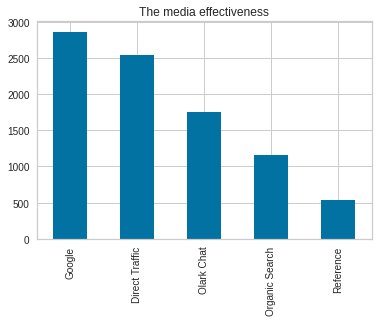

In [ ]:
data['Lead Source'].value_counts().head().plot(kind='bar')
plt.title("The media effectiveness")
plt.show()

From the summary we know that most of the customers research about X Education from Google (2868 customers). This can be used as research materials to determine how the marketing performance on every media platforms.

In [ ]:
data.groupby(['What is your current occupation']).size().sort_values(ascending=False).head()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
dtype: int64

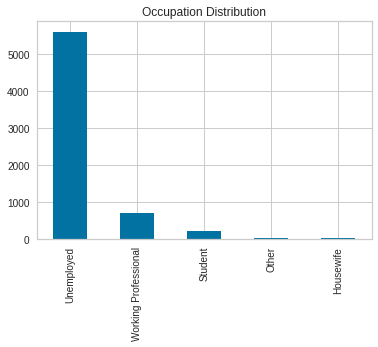

In [ ]:
data['What is your current occupation'].value_counts().head().plot(kind='bar')
plt.title("Occupation Distribution")
plt.show()

In [ ]:
data.groupby(['Specialization']).size().sort_values(ascending=False).head()

Specialization
Select                       1942
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
dtype: int64

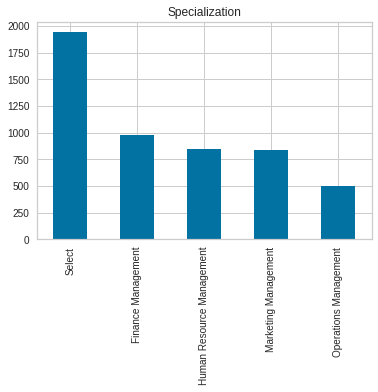

In [ ]:
data['Specialization'].value_counts().head().plot(kind='bar')
plt.title("Specialization")
plt.show()

From the summary above, we know that most of the customers of X Education are unemployed with 5600 customers. And, we know that most of the customers coming from finance management background. This could be research material whether to give a discount for certain customers or even give an credit payment allowance to the customers.

In [ ]:
data.groupby(['Lead Quality']).size().sort_values(ascending=False).head()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
dtype: int64

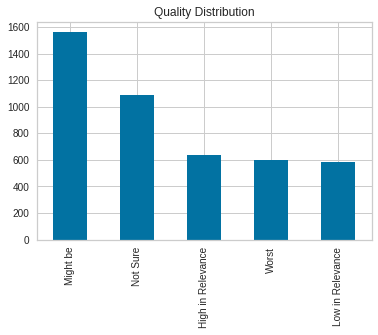

In [ ]:
data['Lead Quality'].value_counts().head().plot(kind='bar')
plt.title("Quality Distribution")
plt.show()

From the summary above, we know that most of the customers of X Education 'Might Be' converted (1560 customers) based on data from employee assigned to the lead.

In [ ]:
data.groupby(['Last Notable Activity']).size().sort_values(ascending=False).head()

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
dtype: int64

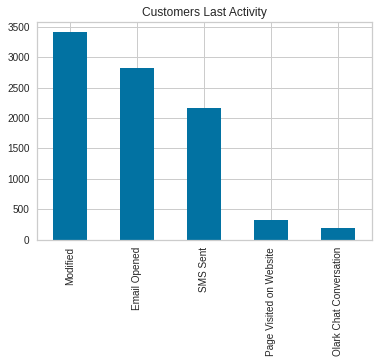

In [ ]:
data['Last Notable Activity'].value_counts().head().plot(kind='bar')
plt.title("Customers Last Activity")
plt.show()

From the summary above, we know that most of the customers of X Education last activities are 'Modified' their profile (3407 customers).

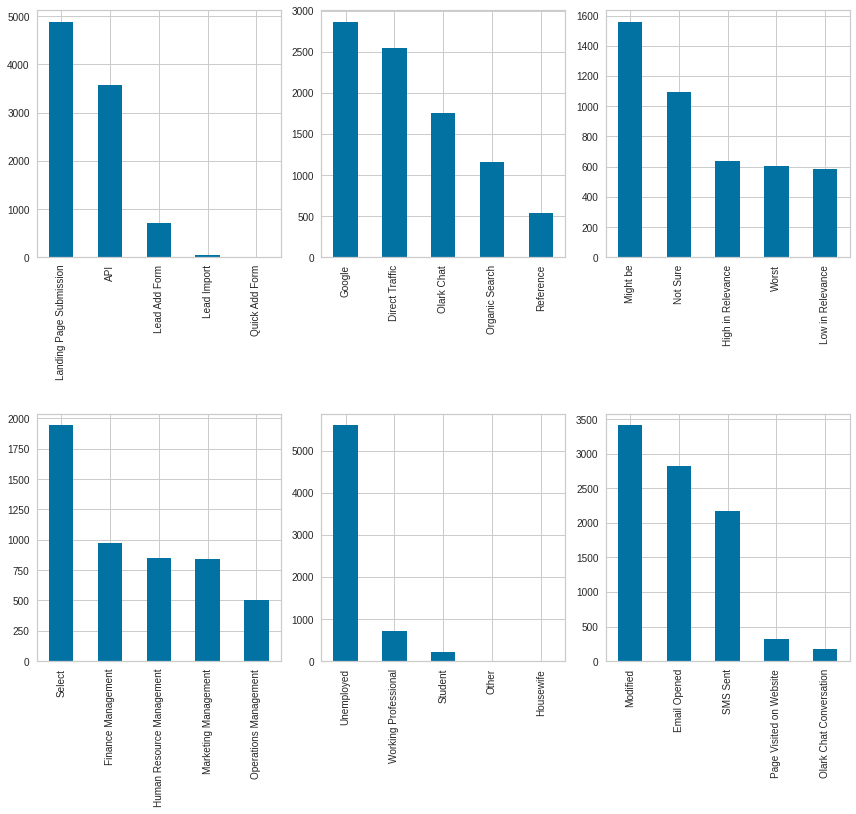

In [ ]:
plt.figure(figsize=(12,15))
cat = ['Lead Origin', 'Lead Source', 'Lead Quality', 'Specialization', 'What is your current occupation', 'Last Notable Activity']
i=1
for col in cat:
    plt.subplot(3,3,i)
    data[col].value_counts().head().plot(kind='bar')
    i +=1
    plt.xticks(rotation=90)
    plt.tight_layout();

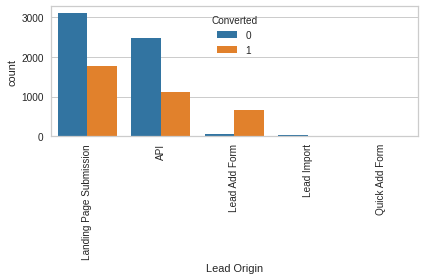

In [ ]:
# Target Feature based on Lead Origin
sns.countplot(data['Lead Origin'], hue=data['Converted'], palette=palette, order = data['Lead Origin'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

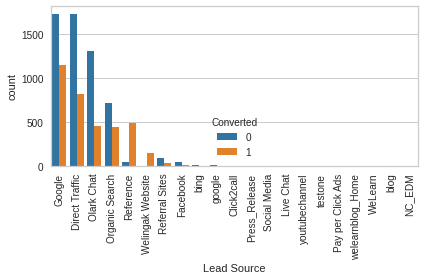

In [ ]:
# Target Feature based on Lead Source
sns.countplot(data['Lead Source'], hue=data['Converted'], palette=palette, order = data['Lead Source'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

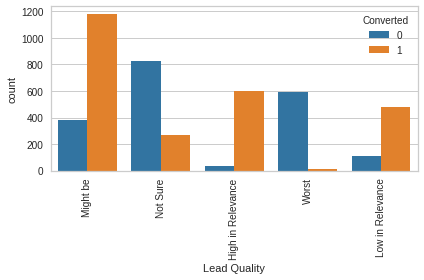

In [ ]:
# Target Feature based on Quality
sns.countplot(data['Lead Quality'], hue=data['Converted'], palette=palette, order = data['Lead Quality'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

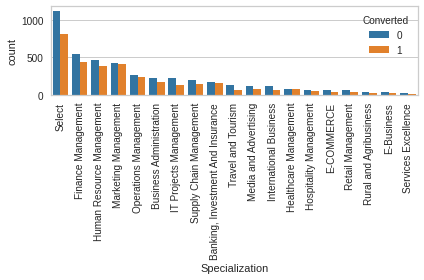

In [ ]:
# Target Feature based on Specialization
sns.countplot(data['Specialization'], hue=data['Converted'], palette=palette, order = data['Specialization'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

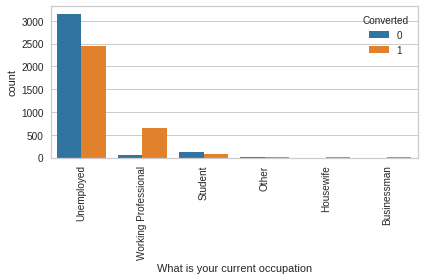

In [ ]:
# Target Feature based on Occupation
sns.countplot(data['What is your current occupation'], hue=data['Converted'], palette=palette, order = data['What is your current occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

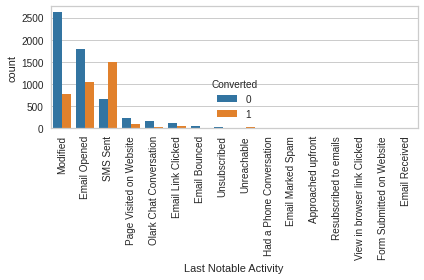

In [ ]:
# Target Feature based on Activity
sns.countplot(data['Last Notable Activity'], hue=data['Converted'], palette=palette, order = data['Last Notable Activity'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout();

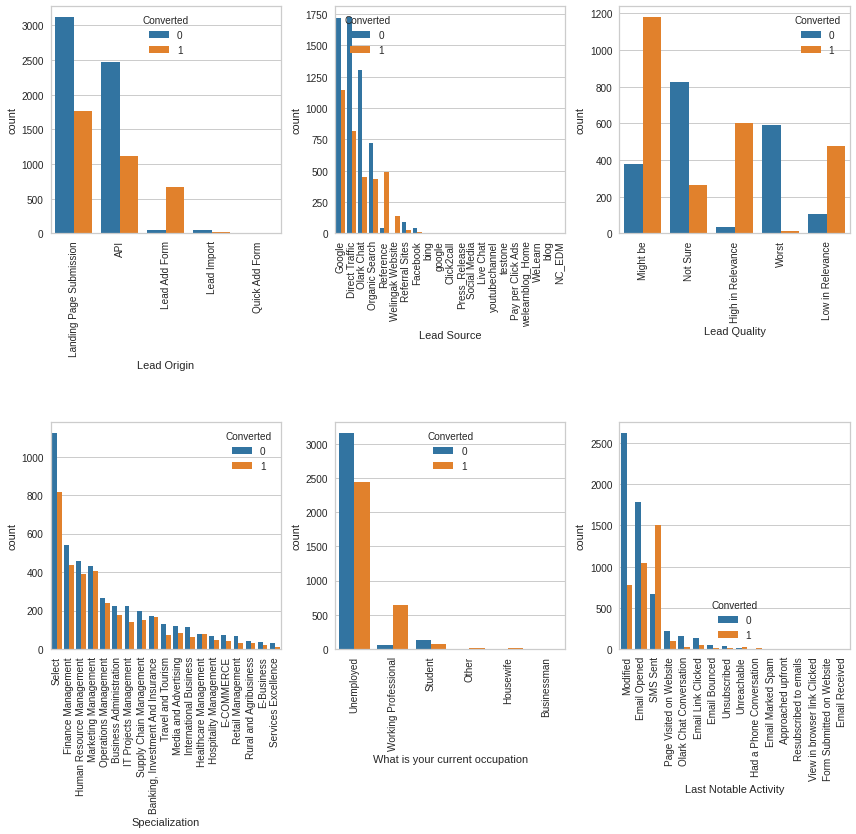

In [ ]:
plt.figure(figsize=(12,15))
cat = ['Lead Origin', 'Lead Source', 'Lead Quality', 'Specialization', 'What is your current occupation', 'Last Notable Activity']
i=1
for col in cat:
    plt.subplot(3,3,i)
    sns.countplot(data[col], hue=data['Converted'], palette=palette, order = data[col].value_counts().index)
    i +=1
    plt.xticks(rotation=90)
    plt.tight_layout();

From the plot above, we know that :
* The customers from `Lead Add Form` had more chance to be converted. Which is X Education could be maximize the convertion rate using `Lead Add Form`
* The Customers source from `Reference` have high convertion rate based on percentage of the converted customers than not. So X Education could maximize the convertion rate by exploit refferal programs.
* X Education employee should take a more caution on customers with `Low in Relevance` category. Because eventhough the customers have low relevancy, the convertion of this category is high. It could be career shifter or fresh grads.
* The occupancy of most customers that converted is `Unemployed`, it is linear with `Specialization` where null values (`Select`) are high. The null values could be because the customers are confused how they define theirself if they're unemployed.
* Customers `Last Notable Activity` with high converted customers more likely had interaction with the X Education content (mail, website, sms) so the content on media have high impact on convertion rate.

# Preprocessing

## Missing Value Handling

In [ ]:
data.isna().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [ ]:
# Fill NaN categorical with "Other"
col = ['Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City']
data[col] = data[col].fillna("Other")

# Change NaN index with "00.Other"
col = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']
data[col] = data[col].fillna("00.Other")

# Fill NaN numerical with 0
col = ['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
data[col] = data[col].fillna(0)

## Duplicated Value Handling

In [ ]:
data.duplicated().sum()

0

Luckily, there aren't duplicate values on our dataset.

## Anomalies Handling

If we pay attention to the columns, we will find that there are columns with "Select" values. This happen because the website setting where the option set to "optional" and cause the customer could skip the option.

In [ ]:
data[(data == 'Select').any(axis=1)].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Other,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Change "missclick" anomalies with other
data = data.replace("Select", "Other")

In [ ]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Other,No,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Other,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Feature Engineering

## Imputation

In [ ]:
# Drop the Prospect ID and Lead Number since it could be unique for every rows
df_model = data.drop(columns=['Prospect ID' , 'Lead Number'])

# Drop the columns that contains only one values
df_model = df_model.drop(columns=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

# Drop the columns that more likely not used
df_model = df_model.drop(columns=['Lead Origin', 'Lead Source', 'Tags', 'Last Activity', 'How did you hear about X Education', 'City'])

## Encoding

In [ ]:
# Switch rank between index to prevent misleading index
df_model = df_model.replace('03.Low', '01.Low')
df_model = df_model.replace('01.High', '03.High')

# Label encoding
le = LabelEncoder()

df_model['Asymmetrique Activity Index'] = le.fit_transform(df_model['Asymmetrique Activity Index'])
df_model['Asymmetrique Profile Index'] = le.fit_transform(df_model['Asymmetrique Profile Index'])

In [ ]:
# Frequency Encoding for high cardinality columns
col_freq = ['Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Quality', 'Lead Profile', 'Last Notable Activity']
for col in col_freq:
  fe = df_model.groupby(col).size()/len(df_model)
  df_model.loc[:, col] = df_model[col].map(fe)

In [ ]:
# Transform certain columns using normalization
col_trans = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
scaler = MinMaxScaler()
df_model[col_trans] = scaler.fit_transform(df_model[col_trans])

In [ ]:
# Dummy Encoding
df_model = pd.get_dummies(df_model, drop_first=True)
df_model

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
0,0,0.000000,0.000000,0.000000,0.266342,0.365801,0.606061,0.706494,0.063095,0.741883,0.666667,0.666667,0.833333,0.75,0.368723,0,0,0,0,0,0,0,0,0
1,0,0.019920,0.296655,0.045455,0.702597,0.365801,0.606061,0.706494,0.515909,0.741883,0.666667,0.666667,0.833333,0.75,0.305952,0,0,0,0,0,0,0,0,0
2,1,0.007968,0.674296,0.036364,0.702597,0.043615,0.022727,0.706494,0.168831,0.174567,0.666667,1.000000,0.777778,1.00,0.305952,0,0,0,0,0,0,0,0,1
3,0,0.003984,0.134243,0.018182,0.702597,0.021970,0.606061,0.706494,0.118182,0.741883,0.666667,1.000000,0.722222,0.85,0.368723,0,0,0,0,0,0,0,0,0
4,1,0.007968,0.628521,0.018182,0.702597,0.365801,0.606061,0.706494,0.168831,0.741883,0.666667,1.000000,0.833333,0.90,0.368723,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0.031873,0.812060,0.048545,0.002273,0.039610,0.606061,0.706494,0.068939,0.174567,0.666667,1.000000,0.833333,0.85,0.000216,1,0,0,0,0,0,0,0,0
9236,0,0.007968,0.104754,0.036364,0.702597,0.021970,0.606061,0.706494,0.168831,0.174567,0.666667,1.000000,0.777778,0.95,0.235065,0,0,0,0,0,0,0,0,1
9237,0,0.007968,0.087588,0.036364,0.702597,0.043615,0.606061,0.706494,0.118182,0.174567,0.666667,1.000000,0.722222,1.00,0.235065,1,0,0,0,0,0,0,0,1
9238,1,0.011952,0.219630,0.054545,0.702597,0.091775,0.292857,0.293290,0.515909,0.741883,0.666667,0.666667,0.833333,0.80,0.235065,0,0,0,0,0,0,0,0,0


# Modeling Preparation

## Train-Test Split

In [ ]:
# Data percentage train 90 : test 10
X = df_model.drop(['Converted'],axis = 1)
y = df_model['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

## Target Feature Percentage

In [ ]:
# View the percentage of target feature
target = y_train.value_counts().reset_index()
target.rename(columns={'index':'Converted','Converted':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Converted,freq,percentage
0,0,5098,61.3
1,1,3218,38.7


# Modeling

## Find best models

In [ ]:
s = setup(data = df_model, target='Converted', session_id=123)

,Description,Value
0,session_id,123
1,Target,Converted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9240, 24)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8704,0.9396,0.8163,0.8471,0.8311,0.7261,0.7267,0.169
gbc,Gradient Boosting Classifier,0.8684,0.9372,0.7925,0.8598,0.8246,0.7196,0.7214,0.865
rf,Random Forest Classifier,0.8613,0.9255,0.8032,0.8354,0.8188,0.7065,0.7071,1.022
ada,Ada Boost Classifier,0.8593,0.9283,0.7917,0.8396,0.8147,0.7014,0.7025,0.410
et,Extra Trees Classifier,0.8492,0.9145,0.7866,0.8203,0.8029,0.6809,0.6816,0.957
knn,K Neighbors Classifier,0.8146,0.8771,0.7462,0.7720,0.7586,0.6082,0.6087,0.251
dt,Decision Tree Classifier,0.8089,0.7994,0.7572,0.7548,0.7558,0.5988,0.5990,0.059
lda,Linear Discriminant Analysis,0.7707,0.8375,0.6273,0.7450,0.6808,0.5040,0.5088,0.038
ridge,Ridge Classifier,0.7701,0.0000,0.6234,0.7460,0.6788,0.5021,0.5072,0.028
lr,Logistic Regression,0.7698,0.8375,0.6305,0.7411,0.6810,0.5028,0.5070,0.759


## Light Gradient Boosting modeling

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Machine Learning using Light Gradient Boosting modeling
model = LGBMClassifier(random_state=22)
model.fit(X_train, y_train)
preds = model.predict(X_test)

## Evaluation

In [ ]:
# compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

 98%|===================| 8170/8316 [00:39<00:00]       

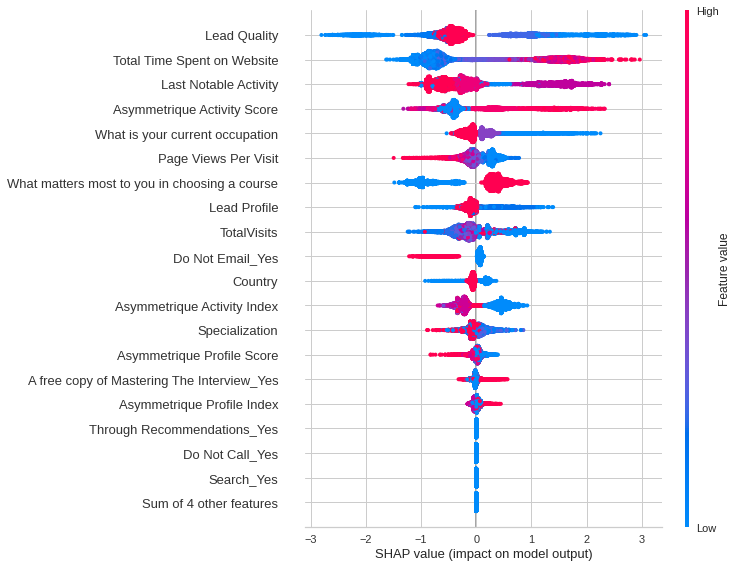

In [ ]:
# Shap Plot
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=20)

In [ ]:
# Calculate feature importances

importances = pd.DataFrame(data={'Attribute':X_train.columns , 'Importance' : model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=True)

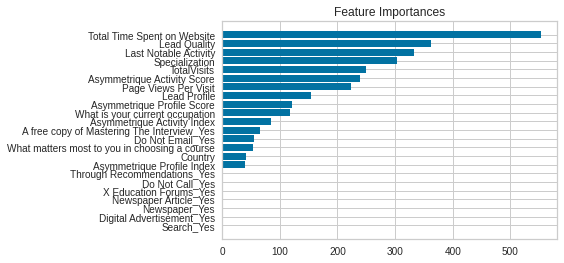

In [ ]:
# Feature importances plot
plt.barh(y=importances['Attribute'], width=importances['Importance'])
plt.title('Feature Importances')
plt.show()

From the plot above, the three 3 most important feature from the model is `Total Time Spent on Website` , `Lead Quality` , and `Last Notable Activity` which is make sense because these three could be our basis to determine if the customers converted or not.

In [ ]:
# Calculate Accuracy 
print('Accuracy',accuracy_score(y_test, preds))

Accuracy 0.8668831168831169


The model succeed to predict with rate 86.68% accuracy.

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, preds)
cm

array([[534,  47],
       [ 76, 267]])

Confusion Matrix Plot


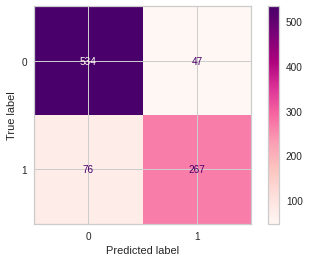

In [ ]:
print("Confusion Matrix Plot")
displr = plot_confusion_matrix(model, X_test, y_test ,cmap=plt.cm.RdPu , values_format='d')
plt.show(displr)

The confusion matrix show :

* The model predicted converted and the customer actually converted is 267. (True Positive)
* The model predicted not converted and the customer actually converted is 76. (False Negative)
* The model predicted converted and the customer actually not converted is 47. (False Positive)
* The model predicted not converted and the customer actually not converted is 534. (True Negative)

In [ ]:
# calculate AUC
probs = model.predict_proba(X_test)[:, 1]
print('AUC ',roc_auc_score(y_test, probs))

# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

# calculate Precision
print('Precision ',precision_score(y_test, preds))

# calculate Recall
print('Recall ',recall_score(y_test, preds))

AUC  0.9299212677448654
F1 Score  0.8127853881278538
Precision  0.8503184713375797
Recall  0.7784256559766763


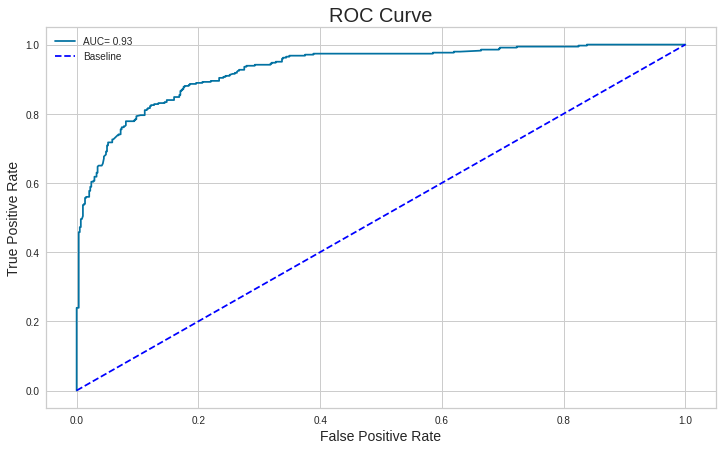

In [ ]:
auc_final = roc_auc_score(y_test, probs)
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr_final, tpr_final, label=f'AUC= {auc_final:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

* AUC : The model succeed to distinct between True Positive and True Negative with chance 92.99%
* F1 Score : the harmonic mean between precission and recall is 81.27% which is important for us to consider False Positive and False Negative.
* Precission : The rate of model predict results are False Positive (which is 85.03%)
* Recall : The rate of model predict results are False Negative (which is 77.84%)

In this kind of data, we must concern on False Positive. This is because we should put our focus on the customer which is predicted to converted but actually not. So the better Precision score, the better company will be prepared.

# Data Simulation

In [ ]:
def convertion_rate(X_test, y_test, preds, campaign, revenue, cost):
  # Make new df with test data and prediction
  df_sim = pd.concat([X_test, y_test], axis=1)
  df_sim['Prediction'] = preds

  # Make new column based on converted and prediction values
  df_sim.loc[df_sim['Converted'] == df_sim['Prediction'], 'Results'] = int(1)
  df_sim.loc[df_sim['Converted'] != df_sim['Prediction'], 'Results'] = int(0)
  df_sim['Results'] = df_sim['Results'].astype(int)
  df_sim

  # Get df with only true positive and true negative prediction
  df_sim_true = df_sim[df_sim['Results'] == 1]
  df_sim_true

  print('==============================================================================================================')
  # Total Customers tested
  total_customers = df_sim.shape[0]
  print(f"Summary for Total Customers {total_customers}")
  print(f"With assumed cost per customers {cost}, assumed revenue per customer {revenue}, and campaign succeed rate {campaign}%")
  print('==============================================================================================================')
  print("Before Machine Learning :")
  # Total Customers group by Converted
  total_converted_customers = (df_sim[df_sim['Converted'] == 1]).shape[0]
  total_not_converted_customers = (df_sim[df_sim['Converted'] == 0]).shape[0]
  percentage_conv = round(((total_converted_customers*100)/total_customers),2)
  percentage_not_conv = round(((total_not_converted_customers*100)/total_customers),2)
  assumed_revenue_no_ML = total_converted_customers*revenue 
  assumed_cost_no_ML = total_converted_customers*cost
  assumed_profit_no_ML = assumed_revenue_no_ML - assumed_cost_no_ML
  print(f"Total Customers Converted {total_converted_customers}, by Percentage {percentage_conv}%")
  print(f"Total Customers not Converted {total_not_converted_customers}, by Percentage {percentage_not_conv}%")
  print(f"Total Revenue ({assumed_revenue_no_ML}$) - Total Cost ({assumed_cost_no_ML}$) = Total Profit ({assumed_profit_no_ML}$)")
  print('==============================================================================================================')
  print("After Machine Learning :")
  # Total Customers with TP / TN values group by Converted (take down FP / FN)
  total_converted_customers_withML = (df_sim_true[df_sim_true['Converted'] == 1]).shape[0]
  total_not_converted_customers_withML = (df_sim_true[df_sim_true['Converted'] == 0]).shape[0]
  percentage_conv_withML = round(((total_converted_customers_withML*100)/total_customers),2)
  percentage_not_conv_withML = round(((total_not_converted_customers_withML*100)/total_customers),2)
  print(f"Total Customers Converted by ML {total_converted_customers_withML}, by Percentage {percentage_conv_withML}%")
  print(f"Total Customers not Converted by ML {total_not_converted_customers_withML}, by Percentage {percentage_not_conv_withML}%")
  # With more focused on True Negative customers, we decide to put a target campaign to change not converted to converted customers
  campaign_target_percent = campaign
  target_campaign_customers = round((campaign_target_percent/100)*total_not_converted_customers_withML)
  total_conv_customers_after_campaign = target_campaign_customers + total_converted_customers_withML
  total_not_conv_customers_after_campaign = total_customers - total_conv_customers_after_campaign
  percentage_conv_after_campaign = round(((total_conv_customers_after_campaign*100)/total_customers),2)
  percentage_not_conv_after_campaign = round(((total_not_conv_customers_after_campaign*100)/total_customers),2)
  assumed_revenue = total_conv_customers_after_campaign*revenue 
  assumed_cost = total_conv_customers_after_campaign*cost
  assumed_profit= assumed_revenue - assumed_cost
  print("")
  print(f"Target Converted Customers after campaign {target_campaign_customers} customers.")
  print(f"Total Converted Customers after campaign {total_conv_customers_after_campaign}, by Percentage {percentage_conv_after_campaign}%")
  print(f"Total not Converted Customers after campaign {total_not_conv_customers_after_campaign}, by Percentage {percentage_not_conv_after_campaign}%")
  print(f"Total Revenue ({assumed_revenue}$) - Total Cost ({assumed_cost}$) = Total Profit ({assumed_profit}$)")
  print('==============================================================================================================')
  print('Conclusion : ')
  conv_rate_gained = percentage_conv_after_campaign - percentage_conv
  print(f'Convertion Rate after ML ({percentage_conv_after_campaign}%) - Convertion Rate after ML ({percentage_conv}%) = Convertion Rate gained ({conv_rate_gained}%)')
  total_profit_gained = assumed_profit - assumed_profit_no_ML
  print(f'Profit after ML ({assumed_profit_no_ML}$) - Profit before ML ({assumed_profit}$) = Profit gained ({total_profit_gained}$)')
  print('==============================================================================================================')

In [ ]:
convertion_rate(X_test,y_test,preds,100,487,417)

Summary for Total Customers 924
With assumed cost per customers 417, assumed revenue per customer 487, and campaign succeed rate 100%
Before Machine Learning :
Total Customers Converted 343, by Percentage 37.12%
Total Customers not Converted 581, by Percentage 62.88%
Total Revenue (167041$) - Total Cost (143031$) = Total Profit (24010$)
After Machine Learning :
Total Customers Converted by ML 267, by Percentage 28.9%
Total Customers not Converted by ML 534, by Percentage 57.79%

Target Converted Customers after campaign 534 customers.
Total Converted Customers after campaign 801, by Percentage 86.69%
Total not Converted Customers after campaign 123, by Percentage 13.31%
Total Revenue (390087$) - Total Cost (334017$) = Total Profit (56070$)
Conclusion : 
Convertion Rate after ML (86.69%) - Convertion Rate after ML (37.12%) = Convertion Rate gained (49.57%)
Profit after ML (24010$) - Profit before ML (56070$) = Profit gained (32060$)


By using 924 customers data, with assumed 
* revenue per customers 487 dollars ( Rp 7.000.000 )
* cost per customers 417 dollars ( Rp 6.000.000 ) 
* campaign success rate 100%`

The ML model succeed to 
* boost convertion rate by 49.57% 
* raise the profit by 32.060 dollars ( Rp 460.698.376 )